In [43]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle
import warnings
warnings.filterwarnings('ignore')


In [44]:
#  Load Dataset
df = pd.read_csv("shopping_trends.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [45]:
#  Select Numerical Features for Clustering
X = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]


In [46]:
# Fit KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [47]:
# Add Cluster Results
result = pd.DataFrame(data=y_kmeans, columns=['Cluster'])
data = pd.concat([X, result], axis=1)

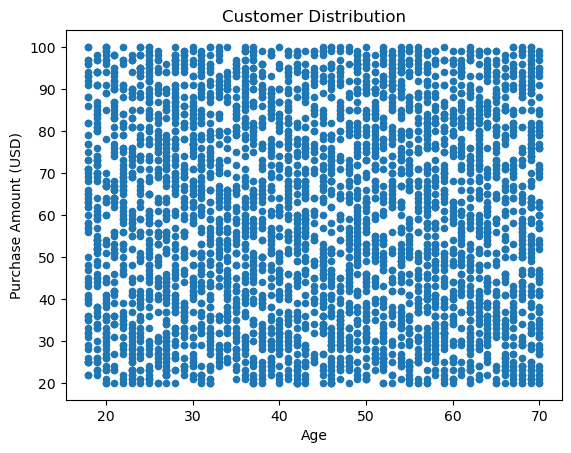

In [48]:
# Visualize Two Dimensions (Age vs Purchase)
X.plot(kind='scatter', x='Age', y='Purchase Amount (USD)', title='Customer Distribution')
plt.show()

In [49]:
#  Predict on Example Input
print("Prediction Example: Age=30, Purchase Amount=200, Rating=4.0, Prev Purchases=3")
print("Predicted Cluster:", kmeans.predict([[30, 200, 4.0, 3]])[0])


Prediction Example: Age=30, Purchase Amount=200, Rating=4.0, Prev Purchases=3
Predicted Cluster: 0


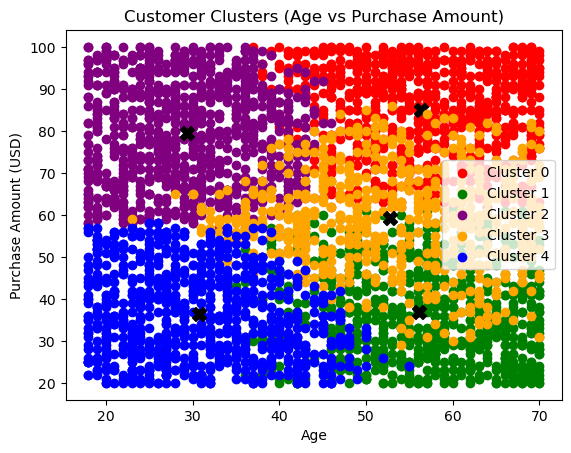

In [50]:
# Visualize All Clusters on Age vs Purchase
colors = ['red', 'green', 'purple', 'orange', 'blue']
for i in range(5):
    cluster = data[data['Cluster'] == i]
    plt.scatter(cluster['Age'], cluster['Purchase Amount (USD)'], color=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], color='black', s=100, marker='X')  # Centroid
plt.title("Customer Clusters (Age vs Purchase Amount)")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.legend()
plt.show()

In [51]:
#  Predict for User Input
print("Enter new customer data to predict cluster")
age = float(input("Enter Age: "))
amount = float(input("Enter Purchase Amount (USD): "))
rating = float(input("Enter Review Rating (1-5): "))
previous = float(input("Enter Previous Purchases: "))

predicted_cluster = kmeans.predict([[age, amount, rating, previous]])[0]
print(f"The customer belongs to cluster {predicted_cluster}")

Enter new customer data to predict cluster


Enter Age:  30
Enter Purchase Amount (USD):  100
Enter Review Rating (1-5):  5
Enter Previous Purchases:  3


The customer belongs to cluster 2


In [52]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Save both model and scaler
with open("Customer_Clustering_Model.pkl", "wb") as f:
    pickle.dump((kmeans, scaler), f)
